In [3]:
import os
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
# os.environ["MODIN_ENGINE"] = "ray" 
# import modin.pandas as pd
# import dask.dataframe as dd
# import seaborn as sns
import re
# from wordcloud import WordCloud
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import nltk
import warnings
import multiprocessing

# import gensim 
# nltk.download('stopwords')
# warnings.filterwarnings('ignore')

plt.style.use(['dark_background'])

In [4]:
%%time
tweets_df=pd.read_csv(r'D:\Data\sentiment_data.csv',encoding='latin-1',header=None)

CPU times: total: 781 ms
Wall time: 7.78 s


### Dataset details
* **target**: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
* **ids**: The id of the tweet ( 2087)
* **date**: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
* **flag**: The query (lyx). If there is no query, then this value is NO_QUERY.
* **user**: the user that tweeted (robotickilldozr)
* **text**: the text of the tweet (Lyx is cool)

In [5]:
tweets_df

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [10]:
#tweets_df=tweets_df.sample(100000)

In [5]:
#Droping unnecessary columns
tweets_df=tweets_df.drop(tweets_df.columns[[1,2,3,4]],axis=1)

In [6]:
tweets_df.columns=['target','tweet']

In [7]:
tweets_df['target'].unique()

array([0, 4], dtype=int64)

In [11]:
tweets_df=tweets_df.replace(4,1)

C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


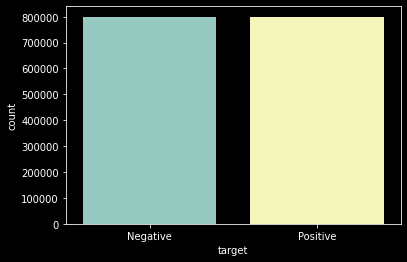

In [12]:
sns.countplot('target',data=tweets_df.replace({0:'Negative',1:'Positive'}))
plt.style.use(['dark_background'])

<b>Length of tweets</b>

In [13]:
tweets_df["length"] = tweets_df["tweet"].apply(len)
tweets_df.head()

,target,tweet,length
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,is upset that he can't update his Facebook by ...,111
2,0,@Kenichan I dived many times for the ball. Man...,89
3,0,my whole body feels itchy and like its on fire,47
4,0,"@nationwideclass no, it's not behaving at all....",111


In [14]:
tweets_df.describe()['length'].astype('int')

count    1600000
mean          74
std           36
min            6
25%           44
50%           69
75%          104
max          374
Name: length, dtype: int32

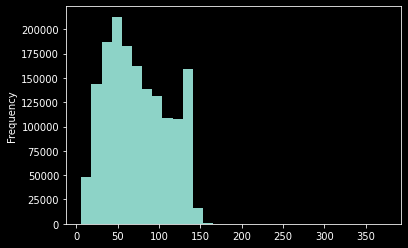

In [15]:
tweets_df["length"].plot(bins = 30,kind = "hist")
plt.show()

# WordCloud

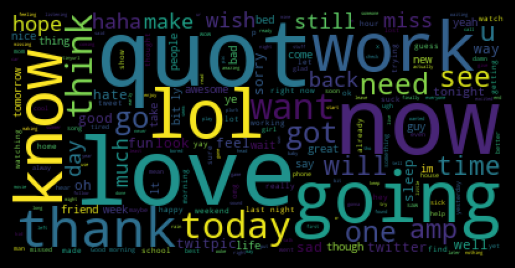

Wall time: 1min 51s


In [14]:
%%time
tweet=tweets_df["tweet"].tolist()
tweet=" ".join(tweet)
plt.imshow(WordCloud().generate(tweet))
plt.axis("off")
plt.show()

Pre-processing the Raw Text and Getting It Ready for Machine Learning

In [15]:
def cleaning(tweet):
    tweet=re.sub(r'[^a-zA-Z]',' ',tweet)
    tweet=tweet.lower()
    tweet=tweet.split()
    ps=PorterStemmer()
    tweet=[ps.stem(word) for word in tweet if word not in stopwords.words("english")]
    tweet=' '.join(tweet)
    return tweet

In [ ]:
shedular='processes' 

In [27]:
%%time
tweets_df['transformed_tweet']=dd.from_pandas(tweets_df.tweet,
                                npartitions=2*multiprocessing.cpu_count()).map_partitions(lambda dframe: dframe.apply(cleaning)).compute(shedular='processes')

Wall time: 1h 6min 58s


In [24]:
# %%time
# def preprocess(text, stem=True):
#     # Remove link,user and special characters
#     text = re.sub(r'[^a-zA-Z]', ' ', str(text).lower()).strip()
#     tokens = []
#     for token in text.split():
#         if token not in stopwords.words("english"):
#             if stem:
#                 tokens.append(stemmer.stem(token))
#             else:
#                 tokens.append(token)
#     return " ".join(tokens)

# stemmer=PorterStemmer()
# df.tweet = tweets_df.tweet.apply(lambda x: preprocess(x))

In [32]:
tweets_df.to_csv(r'D:\Data/sentiment_data_transformed.csv')

In [10]:
tweets_df=pd.read_csv(r'D:\Data/sentiment_data_transformed.csv',encoding='latin-1')

In [11]:
tweets_df

,Unnamed: 0,target,tweet,length,transformed_tweet
0,0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,switchfoot http twitpic com zl awww bummer sho...
1,1,0,is upset that he can't update his Facebook by ...,111,upset updat facebook text might cri result sch...
2,2,0,@Kenichan I dived many times for the ball. Man...,89,kenichan dive mani time ball manag save rest g...
3,3,0,my whole body feels itchy and like its on fire,47,whole bodi feel itchi like fire
4,4,0,"@nationwideclass no, it's not behaving at all....",111,nationwideclass behav mad see
...,...,...,...,...,...
1599995,1599995,1,Just woke up. Having no school is the best fee...,56,woke school best feel ever
1599996,1599996,1,TheWDB.com - Very cool to hear old Walt interv...,78,thewdb com cool hear old walt interview http b...
1599997,1599997,1,Are you ready for your MoJo Makeover? Ask me f...,57,readi mojo makeov ask detail
1599998,1599998,1,Happy 38th Birthday to my boo of alll time!!! ...,65,happi th birthday boo alll time tupac amaru sh...


In [12]:
tweets_df[tweets_df.isna().any(axis=1)]

,Unnamed: 0,target,tweet,length,transformed_tweet
3997,3997,0,what to do,11,NaN
4233,4233,0,just,6,NaN
18950,18950,0,up again,9,NaN
19062,19062,0,I've been here,15,NaN
24317,24317,0,He's not here,14,NaN
...,...,...,...,...,...
1592715,1592715,1,so this it .. then,19,NaN
1595775,1595775,1,here I am,10,NaN
1596318,1596318,1,is ON!!!!!!,12,NaN
1598921,1598921,1,If only?,9,NaN


In [13]:
tweets_df.dropna(inplace =True)

In [20]:
tweets_df.drop(columns=['tweet','Unnamed: 0'],inplace=True)

In [21]:
tweets_df.shape

(1599505, 3)

In [ ]:
#count repetition  no of each word
token_list = [word for sentence in tweets_df['tweet'].values for word in sentence.split()]
# Create a pandas DataFrame
df = pd.DataFrame(token_list, columns=["word"])

# Group by the word and count the occurrences
word_counts = df["word"].value_counts().reset_index()
word_counts.columns = ["word", "count"]

sorted_word_counts = word_counts.sort_values(by="count", ascending=False)

excel_filename = "word_counts.csv"
sorted_word_counts.to_csv(excel_filename, index=False)

print("Excel file saved:", excel_filename)

In [22]:
tweets_df.to_csv(r'D:\Data/sentiment_cleaned_data.csv')